In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# (Optional) Evaluate the model on the validation set
import sklearn.metrics as metrics 
import warnings
warnings.filterwarnings("ignore")

# Metrics

In [83]:
# Creates an empty DataFrame named models_list, to store results of multiple regression models later on
models_list = pd.DataFrame()

In [84]:
df = pd.read_pickle('df_model.pkl')
df

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,unique_playlist_count,...,mode,feat,remix,release_year,release_month,duration_s,before_2010,number_tracks_artist,time_since_release,track_popularity
0,0.682,0.401,-10.068,0.0236,0.279000,0.011700,0.0887,0.566,97.091,1,...,1,0,0,2001,1,235.440,0,2.0,19,41
1,0.582,0.704,-6.242,0.0347,0.065100,0.000000,0.2120,0.698,150.863,1,...,1,0,0,2018,1,197.286,1,1.0,2,15
2,0.303,0.880,-4.739,0.0442,0.011700,0.009940,0.3470,0.404,135.225,1,...,1,0,0,2017,11,373.512,1,2.0,3,28
3,0.659,0.794,-5.644,0.0540,0.000761,0.132000,0.3220,0.852,128.041,1,...,0,0,0,2015,8,228.565,1,5.0,5,24
4,0.662,0.838,-6.300,0.0499,0.114000,0.000697,0.0881,0.496,129.884,1,...,1,0,0,2018,11,236.308,1,1.0,2,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28351,0.744,0.715,-6.103,0.3510,0.101000,0.000000,0.0919,0.340,154.962,1,...,1,0,0,2017,2,179.773,1,3.0,3,72
28352,0.832,0.666,-4.920,0.0633,0.143000,0.000000,0.0720,0.810,109.536,1,...,0,0,0,2010,10,223.890,1,8.0,10,36
28353,0.963,0.603,-6.224,0.1800,0.067300,0.000006,0.2140,0.647,129.990,1,...,1,0,0,2014,12,260.240,1,11.0,6,49
28354,0.458,0.540,-6.457,0.0270,0.715000,0.000428,0.1150,0.657,142.218,1,...,0,0,0,2013,7,191.205,1,1.0,7,40


In [85]:
df.head()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,unique_playlist_count,...,mode,feat,remix,release_year,release_month,duration_s,before_2010,number_tracks_artist,time_since_release,track_popularity
0,0.682,0.401,-10.068,0.0236,0.279000,0.011700,0.0887,0.566,97.091,1,...,1,0,0,2001,1,235.440,0,2.0,19,41
1,0.582,0.704,-6.242,0.0347,0.065100,0.000000,0.2120,0.698,150.863,1,...,1,0,0,2018,1,197.286,1,1.0,2,15
2,0.303,0.880,-4.739,0.0442,0.011700,0.009940,0.3470,0.404,135.225,1,...,1,0,0,2017,11,373.512,1,2.0,3,28
3,0.659,0.794,-5.644,0.0540,0.000761,0.132000,0.3220,0.852,128.041,1,...,0,0,0,2015,8,228.565,1,5.0,5,24
4,0.662,0.838,-6.300,0.0499,0.114000,0.000697,0.0881,0.496,129.884,1,...,1,0,0,2018,11,236.308,1,1.0,2,38


In [86]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
danceability,28352.0,0.653375,0.145791,0.000000,0.56100,0.670000,0.760000,0.983
energy,28352.0,0.698373,0.183508,0.000175,0.57900,0.722000,0.843000,1.000
loudness,28352.0,-6.817777,3.036433,-46.448000,-8.31025,-6.261000,-4.708750,1.275
speechiness,28352.0,0.107939,0.102547,0.000000,0.04100,0.062600,0.133000,0.918
acousticness,28352.0,0.177192,0.222814,0.000000,0.01430,0.079700,0.260000,0.994
instrumentalness,28352.0,0.091129,0.232562,0.000000,0.00000,0.000021,0.006573,0.994
liveness,28352.0,0.190955,0.155888,0.000000,0.09260,0.127000,0.249000,0.996
valence,28352.0,0.510386,0.234344,0.000000,0.32900,0.512000,0.695000,0.991
tempo,28352.0,120.958219,26.954502,0.000000,99.97200,121.993500,133.999000,239.440
unique_playlist_count,28352.0,1.137345,0.485666,1.000000,1.00000,1.000000,1.000000,8.000


In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28352 entries, 0 to 28355
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   danceability           28352 non-null  float64
 1   energy                 28352 non-null  float64
 2   loudness               28352 non-null  float64
 3   speechiness            28352 non-null  float64
 4   acousticness           28352 non-null  float64
 5   instrumentalness       28352 non-null  float64
 6   liveness               28352 non-null  float64
 7   valence                28352 non-null  float64
 8   tempo                  28352 non-null  float64
 9   unique_playlist_count  28352 non-null  int64  
 10  playlist_genre_edm     28352 non-null  int64  
 11  playlist_genre_latin   28352 non-null  int64  
 12  playlist_genre_pop     28352 non-null  int64  
 13  playlist_genre_r&b     28352 non-null  int64  
 14  playlist_genre_rap     28352 non-null  int64  
 15  playlis

<Axes: xlabel='track_popularity', ylabel='Density'>

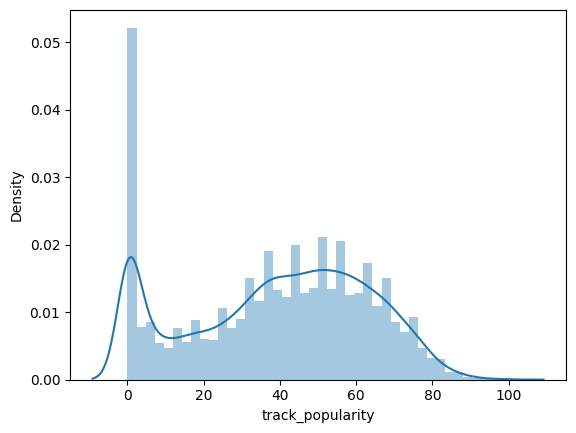

In [88]:
sns.distplot(df.track_popularity)

Creating  a Linear regression  model with depenant value 'track_popularity' 

In [90]:
df['track_popularity'].max()

100

In [91]:
y = df.track_popularity
X = df.drop(columns=['track_popularity'])

# Create and Train the Model

In [93]:
from sklearn.model_selection import train_test_split

In [94]:
# Split into train+val and test sets (80% train+val, 20% test)
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Split train+val into train and val sets (75% train, 25% val from the train+val set)
X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size=0.25, random_state=42
)

# Regression Models

In [96]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
#!pip install xgboost
import xgboost as xgb

### Linear Regression

In [98]:
# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)  # Use X_train and y_train

# Make predictions on the validation set
y_val_pred = model.predict(X_val)

In [99]:
# define the function regressionMetrics

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

def regressionMetrics(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    return {'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'R2': r2}


In [100]:
regressionMetrics(y_val, y_val_pred)

{'MAE': 17.95506572639305,
 'MSE': 466.97948440406464,
 'RMSE': 21.609708105480383,
 'R2': 0.1633970835936872}

In [101]:
model_dict = {'model': "Linear Regression"}
new_row = pd.DataFrame([{**model_dict, **regressionMetrics(y_val, y_val_pred)}])
models_list = pd.concat([models_list, new_row], ignore_index=True)
models_list

,model,MAE,MSE,RMSE,R2
0,Linear Regression,17.955066,466.979484,21.609708,0.163397


<Axes: xlabel='track_popularity'>

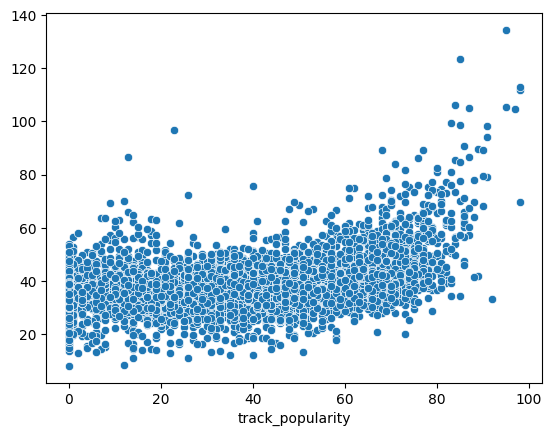

In [102]:
sns.scatterplot(x=y_val, y=y_val_pred)

### Decision Tree

In [104]:
mod2 = DecisionTreeRegressor(random_state=1)
mod2.fit(X_train, y_train)
# Make predictions on the validation set
y_val_pred2 = mod2.predict(X_val)

In [105]:
regressionMetrics(y_val, y_val_pred2)

{'MAE': 21.693263974607653,
 'MSE': 808.7634015164874,
 'RMSE': 28.43876582266691,
 'R2': -0.4489155155388531}

In [106]:
model_dict = {'model': "Decision Tree"}
new_row = pd.DataFrame([{**model_dict, **regressionMetrics(y_val, y_val_pred2)}])
models_list = pd.concat([models_list, new_row], ignore_index=True)
models_list


,model,MAE,MSE,RMSE,R2
0,Linear Regression,17.955066,466.979484,21.609708,0.163397
1,Decision Tree,21.693264,808.763402,28.438766,-0.448916


<Axes: xlabel='track_popularity'>

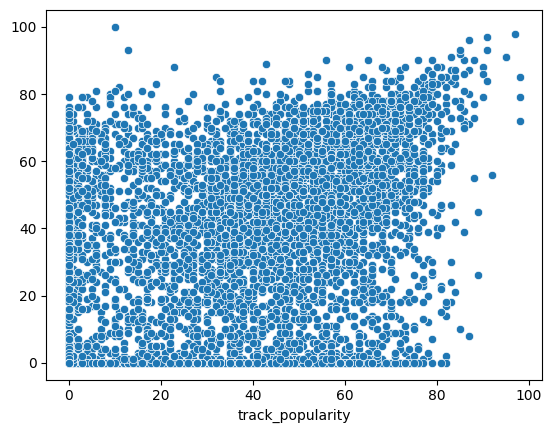

In [107]:
sns.scatterplot(x=y_val, y=y_val_pred2)

### Random Forest


In [109]:
mod3 = RandomForestRegressor(random_state=1)
mod3.fit(X_train, y_train)
# Make predictions on the validation set
y_val_pred3 = mod3.predict(X_val)

In [110]:
regressionMetrics(y_val, y_val_pred3)

{'MAE': 16.509194758629956,
 'MSE': 413.7211967630391,
 'RMSE': 20.340137579747072,
 'R2': 0.2588103517378936}

In [111]:
pred3 = mod3.predict(X)
model_dict = {'model': "RandomForest"}
new_row = pd.DataFrame([{**model_dict, **regressionMetrics(y_val, y_val_pred3)}])
models_list = pd.concat([models_list, new_row], ignore_index=True)
models_list

,model,MAE,MSE,RMSE,R2
0,Linear Regression,17.955066,466.979484,21.609708,0.163397
1,Decision Tree,21.693264,808.763402,28.438766,-0.448916
2,RandomForest,16.509195,413.721197,20.340138,0.258810


<Axes: xlabel='track_popularity'>

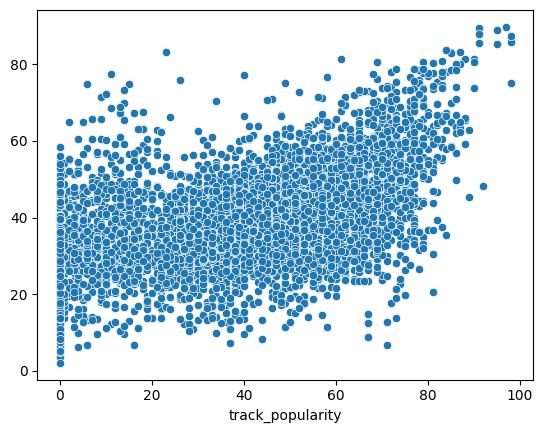

In [112]:
sns.scatterplot(x=y_val, y=y_val_pred3)

### Adaptive Boosting (ADABoost)

In [114]:
mod4 = AdaBoostRegressor(random_state=1)
mod4.fit(X_train, y_train)

AdaBoostRegressor(random_state=1)

In [115]:
# Make predictions on the validation set
y_val_pred4 = mod4.predict(X_val)

In [116]:
model_dict = {'model': "ADABoost"}
new_row = pd.DataFrame([{**model_dict, **regressionMetrics(y_val, y_val_pred4)}])
models_list = pd.concat([models_list, new_row], ignore_index=True)
models_list

,model,MAE,MSE,RMSE,R2
0,Linear Regression,17.955066,466.979484,21.609708,0.163397
1,Decision Tree,21.693264,808.763402,28.438766,-0.448916
2,RandomForest,16.509195,413.721197,20.340138,0.258810
3,ADABoost,18.448538,471.006221,21.702678,0.156183


<Axes: xlabel='track_popularity'>

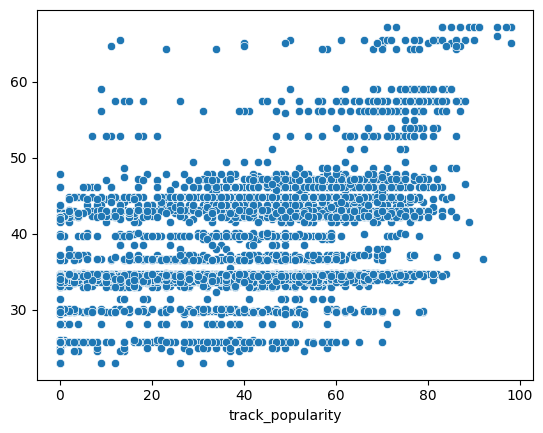

In [117]:
sns.scatterplot(x=y_val, y=y_val_pred4)

### Gradient Boosting Machine (GBM)

In [119]:
mod5 = GradientBoostingRegressor(random_state=1)
mod5.fit(X_train, y_train)

GradientBoostingRegressor(random_state=1)

In [120]:
# Make predictions on the validation set
y_val_pred5 = mod5.predict(X_val)

In [121]:
model_dict = {'model': "GBM"}
new_row = pd.DataFrame([{**model_dict, **regressionMetrics(y_val, y_val_pred5)}])
models_list = pd.concat([models_list, new_row], ignore_index=True)
models_list

,model,MAE,MSE,RMSE,R2
0,Linear Regression,17.955066,466.979484,21.609708,0.163397
1,Decision Tree,21.693264,808.763402,28.438766,-0.448916
2,RandomForest,16.509195,413.721197,20.340138,0.258810
3,ADABoost,18.448538,471.006221,21.702678,0.156183
4,GBM,16.877220,419.979703,20.493406,0.247598


<Axes: xlabel='track_popularity'>

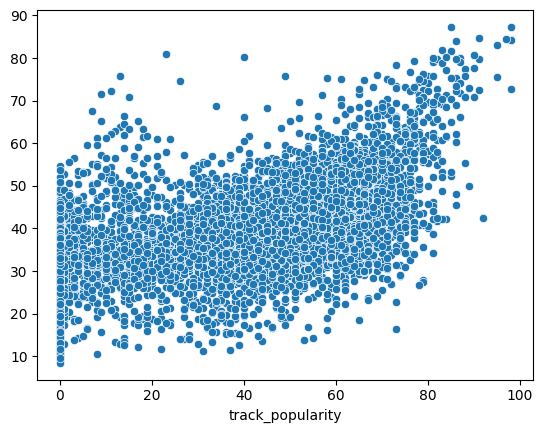

In [122]:
sns.scatterplot(x=y_val, y=y_val_pred5)

### Support Vector Machine (SVM)

In [124]:
mod6 = SVR()
mod6.fit(X_train, y_train)
# Make predictions on the validation set 
y_val_pred6 = mod6.predict(X_val)

In [125]:
model_dict = {'model': "SVM"}
new_row = pd.DataFrame([{**model_dict, **regressionMetrics(y_val,y_val_pred6)}])
models_list = pd.concat([models_list, new_row], ignore_index=True)
models_list


,model,MAE,MSE,RMSE,R2
0,Linear Regression,17.955066,466.979484,21.609708,0.163397
1,Decision Tree,21.693264,808.763402,28.438766,-0.448916
2,RandomForest,16.509195,413.721197,20.340138,0.258810
3,ADABoost,18.448538,471.006221,21.702678,0.156183
4,GBM,16.877220,419.979703,20.493406,0.247598
5,SVM,19.471286,557.874948,23.619377,0.000556


<Axes: xlabel='track_popularity'>

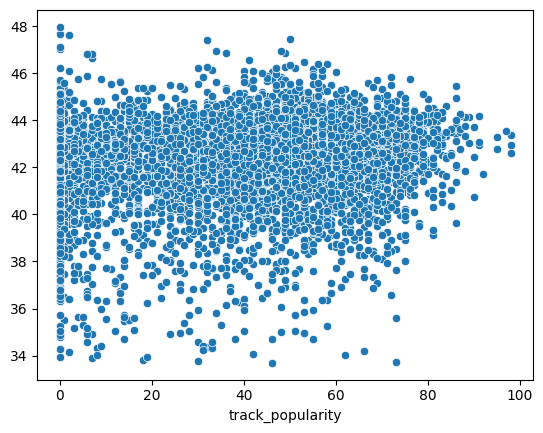

In [126]:
sns.scatterplot(x=y_val, y=y_val_pred6)

### XGBoost Regressor

In [128]:
mod7= xgb.XGBRegressor()
mod7.fit(X_train, y_train)
# Make predictions on the validation set
y_val_pred7 = mod7.predict(X_val)

In [129]:
model_dict = {'model': "XGB"}
new_row = pd.DataFrame([{**model_dict, **regressionMetrics(y_val,y_val_pred7)}])
models_list = pd.concat([models_list, new_row], ignore_index=True)
models_list

,model,MAE,MSE,RMSE,R2
0,Linear Regression,17.955066,466.979484,21.609708,0.163397
1,Decision Tree,21.693264,808.763402,28.438766,-0.448916
2,RandomForest,16.509195,413.721197,20.340138,0.258810
3,ADABoost,18.448538,471.006221,21.702678,0.156183
4,GBM,16.877220,419.979703,20.493406,0.247598
5,SVM,19.471286,557.874948,23.619377,0.000556
6,XGB,16.662160,424.961615,20.614597,0.238673


<Axes: xlabel='track_popularity'>

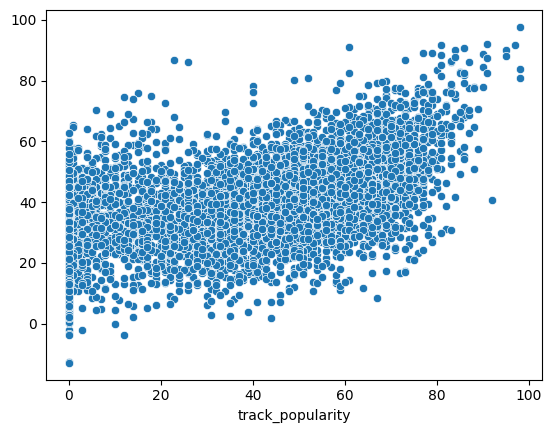

In [130]:
sns.scatterplot(x=y_val, y=y_val_pred7)

In [131]:
## Model Selection

Metrics:<br><b>MSE</b> - Mean Squared Error<br><b>RMSE</b> Root Mean Squared Error<br><b>MAE </b>Mean Absolute Error Calculates the average of the absolute differences between predicted and actual values.<br>
<b>RMSLE</b> Root Mean Squared Logarithmic Error

In [133]:
models_list.sort_values('MAE')

,model,MAE,MSE,RMSE,R2
2,RandomForest,16.509195,413.721197,20.340138,0.258810
6,XGB,16.662160,424.961615,20.614597,0.238673
4,GBM,16.877220,419.979703,20.493406,0.247598
0,Linear Regression,17.955066,466.979484,21.609708,0.163397
3,ADABoost,18.448538,471.006221,21.702678,0.156183
5,SVM,19.471286,557.874948,23.619377,0.000556
1,Decision Tree,21.693264,808.763402,28.438766,-0.448916


# Hyperparameters and Finetuning

In [135]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV


# Random Search: we decide which parameters and how (randomly)

This block is focused on hyperparameter tuning for a Random Forest model using RandomizedSearchCV

In [138]:
# Reduced number of options for each hyperparameter
n_estimators = [100, 200, 300]  # Fewer values for the number of trees
max_features = ['auto','sqrt']  #  # Number of features to consider at each split
max_depth = [10, 20, 30, 40, None]  # Fewer values for max depth
min_samples_split = [2, 5, 10]  # Keep essential options only
min_samples_leaf = [1, 2, 4]  # Reduced options for leaf samples
bootstrap = [True, False]  # Keep as is

# Create a lighter random grid

lighter_grid = {
    'n_estimators': n_estimators,
    'max_features': max_features,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf,
    'bootstrap': bootstrap
}

print(lighter_grid)

# Reduced number of iterations and cross-validation folds
rf_random = RandomizedSearchCV(estimator=mod3, param_distributions=lighter_grid, n_iter=25, cv=3, 
                               verbose=2, random_state=42, n_jobs=-1)

# Fit the random search model
rf_random.fit(X_train, y_train)

{'n_estimators': [100, 200, 300], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}
Fitting 3 folds for each of 25 candidates, totalling 75 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(random_state=1),
                   n_iter=25, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300]},
                   random_state=42, verbose=2)

evaluate function, which measures how well a model performs on test data

In [140]:
from sklearn.metrics import r2_score, mean_absolute_error

def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    mae = mean_absolute_error(test_labels, predictions)
    r2 = r2_score(test_labels, predictions)

    print('Model Performance')
    print('Mean Absolute Error (MAE): {:0.4f}'.format(mae))
    print('R² Score: {:0.4f}'.format(r2))

    return {'mae': mae, 'r2': r2}


Running base Model¶

Here we use the evaluate model we created a cell before

In [143]:
base_model = RandomForestRegressor(n_estimators = 100, random_state = 4)
base_model.fit(X_train, y_train)
base_accuracy = evaluate(base_model, X_test, y_test)

Model Performance
Mean Absolute Error (MAE): 16.4216
R² Score: 0.2637


In [144]:
best_random = rf_random.best_estimator_ #This retrieves the best-performing model found during the random search. It’s already fitted — ready for prediction and evaluation
random_accuracy = evaluate(best_random, X_test, y_test) #using your custom evaluate() function to measure: MAE, R2


Model Performance
Mean Absolute Error (MAE): 16.3970
R² Score: 0.2809


Comparisson

In [146]:
print('MAE Improvement of {:0.2f}%.'.format(
    100 * (base_accuracy['mae'] - random_accuracy['mae']) / base_accuracy['mae']
))


MAE Improvement of 0.15%.


## Conclusion 